# Unit 3 - Lesson 2 - Challenge - If a tree falls in the forest
---------------------

# Human Resources Analytics
## Source of data:
 - [https://www.kaggle.com/jaishofficial/human-resources-analytics](https://www.kaggle.com/jaishofficial/human-resources-analytics)
-----------------------

# Contents

- [Import Modules and Load Data](#Import-Modules-and-Load-Data)

- [What Does the Data Look Like?](#What-Does-the-Data-Look-Like?)

- [Clean the Data](#Clean-the-Data)

- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

- [Variables of Interest](#Variables-of-Interest)

- [Additional Features](#Additional-Features)

- [Filtering Features](#Filtering-Features)

-------------------
# Import Modules and Load Data
## Import modules and enable the display of plots in this notebook

In [1]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Ignore harmless seaborn warnings

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load the dataset into a DataFrame

In [3]:
file = 'https://raw.githubusercontent.com/djrgit/coursework/master/thinkful/data_science/my_progress/unit_3_deeper_into_supervised_learning/HR_comma_sep.csv'
hr = pd.read_csv(file)

-------------------
# What Does the Data Look Like?

## What is the shape of the dataset?

In [4]:
hr.shape

(14999, 10)

## What information can be quickly learned about the dataset?

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## How is the dataset structured?

In [6]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


--------------------
# Clean the Data

In [7]:
hr = hr.rename(index=str, columns={'average_montly_hours': 'avg_monthly_hours', 'sales': 'dept'})

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
# Convert categorical entries into numerical entries (low, medium, high --> 1, 2, 3)
def numerize(level):
    if level == 'low':
        level = 1
    elif level == 'medium':
        level = 2
    elif level == 'high':
        level = 3
    return level

In [10]:
hr['salary'] = hr['salary'].apply(numerize)

In [11]:
hr.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


------------------
# Exploratory Data Analysis

## What are some statistics for columns with numerical data?

In [12]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


## How does the data vary in columns with numerical data?

In [13]:
hr.var().nlargest(10)

avg_monthly_hours        2494.313175
time_spend_company          2.131998
number_project              1.519284
salary                      0.406002
left                        0.181411
Work_accident               0.123706
satisfaction_level          0.061817
last_evaluation             0.029299
promotion_last_5years       0.020817
dtype: float64

## What sorts of possible correlations in the data become more apparent in a pairplot?

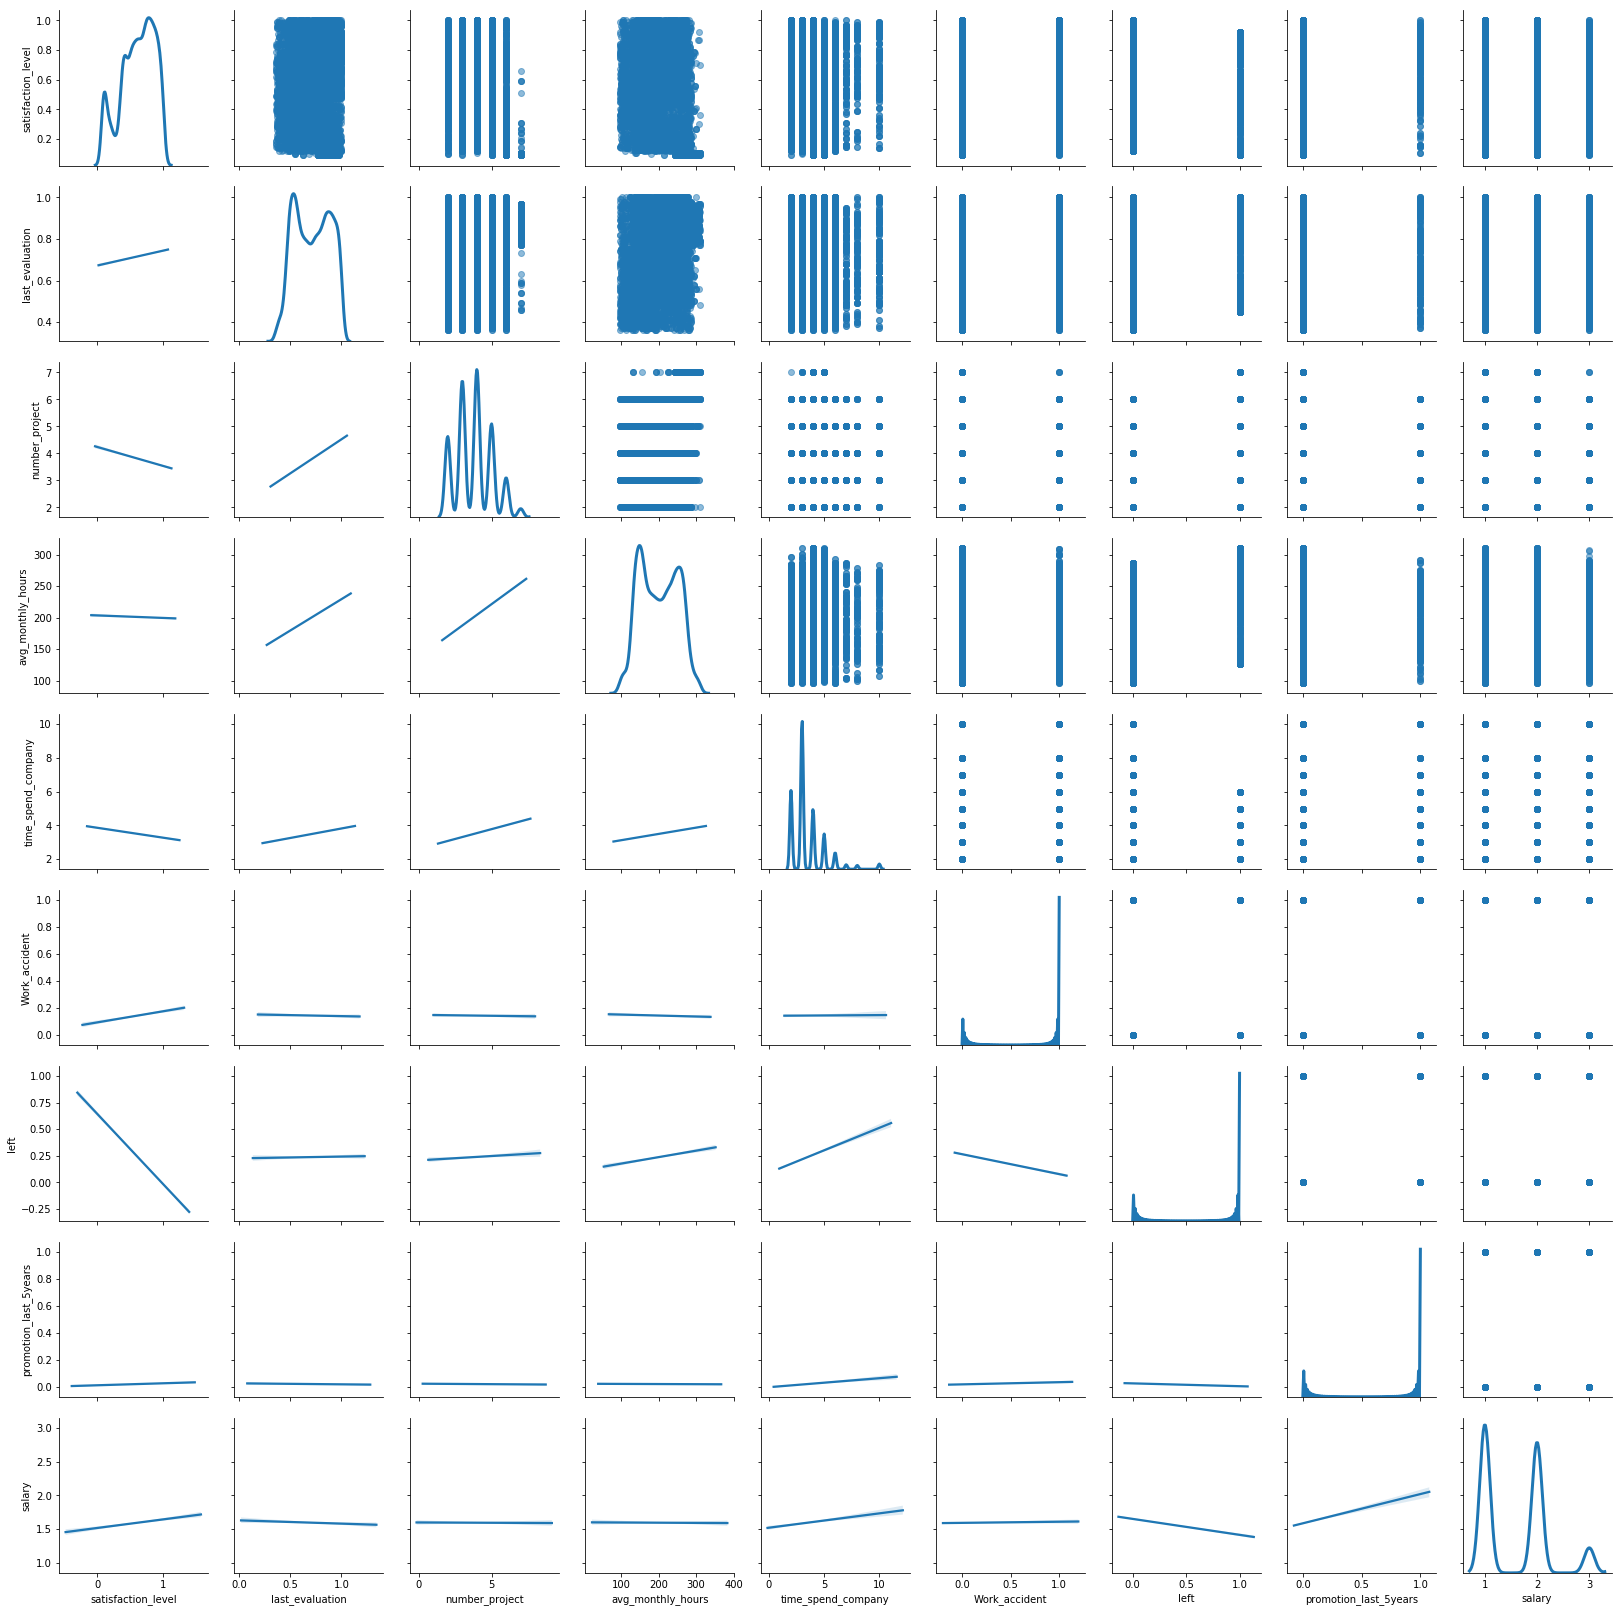

In [14]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(hr.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

## What does a correlation matrix look like?

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
avg_monthly_hours               -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
salary                           0.050022        -0.013002       -0.001803   

                       avg_monthly_hours  time_spend_company  Work_accident  \
satisfaction_level             -0.020048           -0.100866       0.058697   
last_evaluation                 0.339742            0.131591 

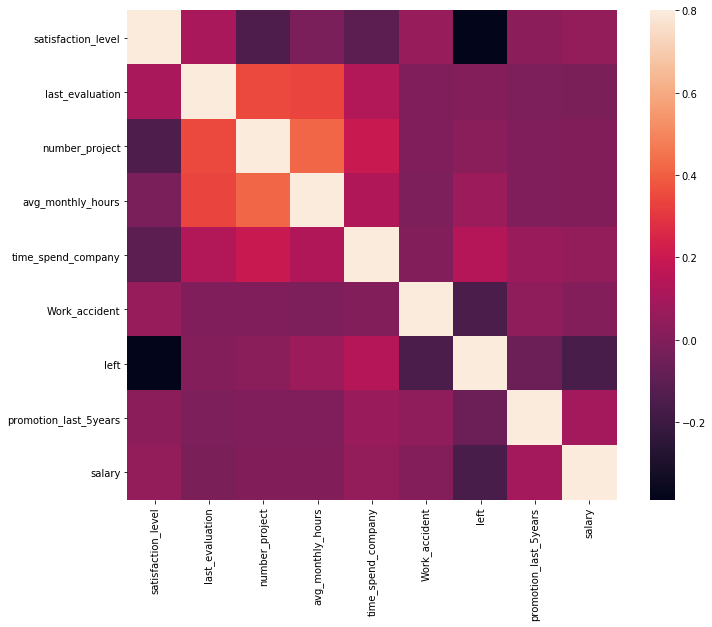

In [15]:
# Make the correlation matrix.
corrmat = hr.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Variables of Interest

##  Select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far. 

###### Outcome variable:
   - 'left'

###### Categorical / Continuous variables:
   - 'salary'
   - 'dept'
   - 'satisfaction_level'
   - 'last_evaluation'
   - 'number_project'
   - 'avg_monthly_hours'
   - 'time_spend_company'

## How many employees in each department fall into each salary tier?

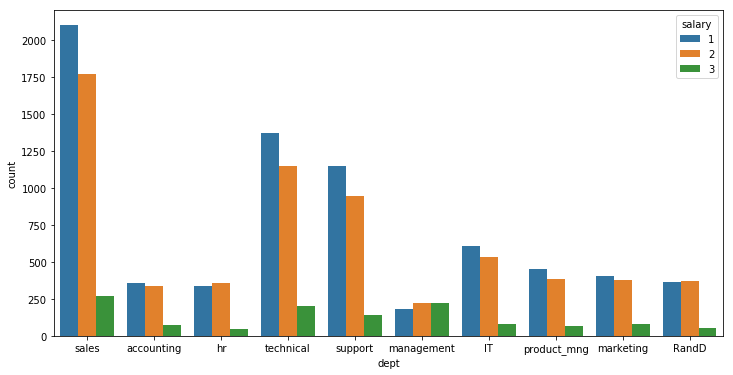

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='dept', hue='salary', data=hr)
plt.show()

## How does attrition vary amongst different departments?

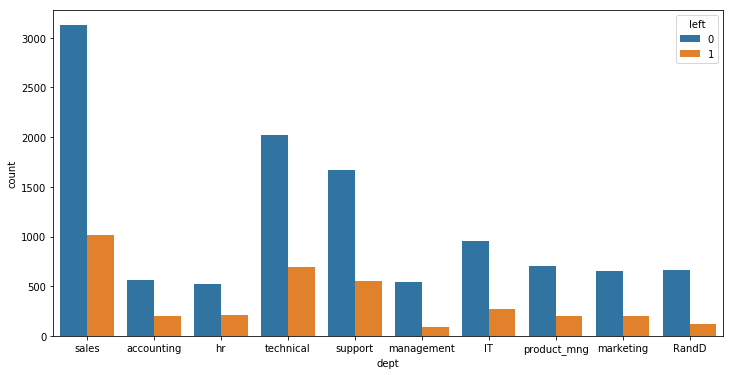

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='dept', hue='left', data=hr)
plt.show()

## How does satisfaction level vary among employees that left?

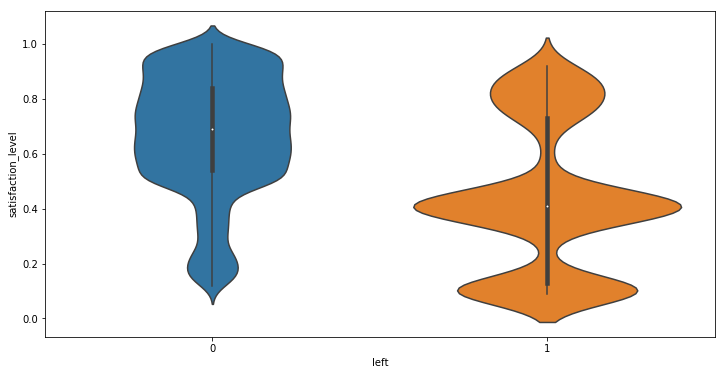

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='left', y='satisfaction_level', data=hr)
plt.show()

## How do employees' last evaluations vary among employees that left?

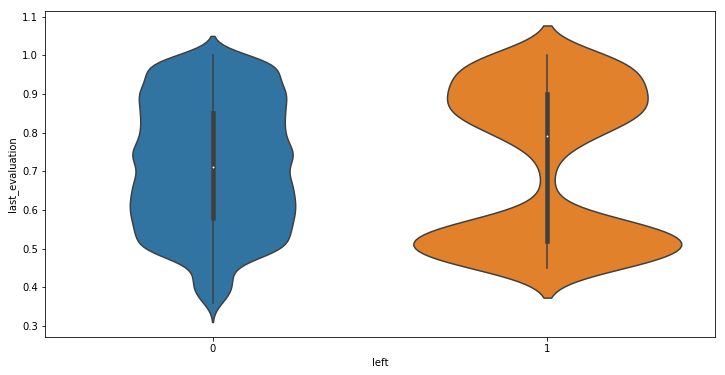

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='left', y='last_evaluation', data=hr)
plt.show()

## How does the number of projects vary among the employees that left?

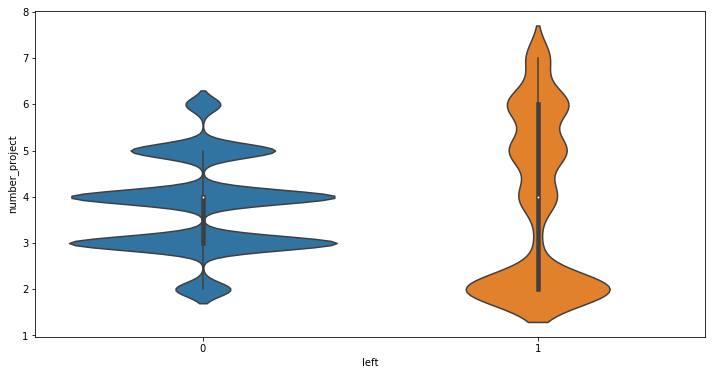

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='left', y='number_project', data=hr)
plt.show()

## How do employees' average monthly hours vary among employees that left?

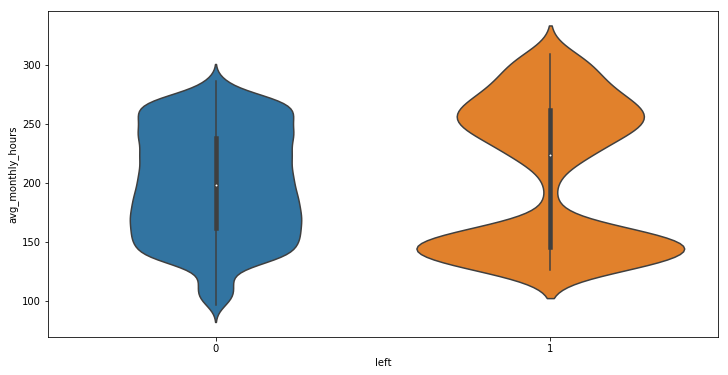

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='left', y='avg_monthly_hours', data=hr)
plt.show()

## How does attrition vary across different salary tiers?

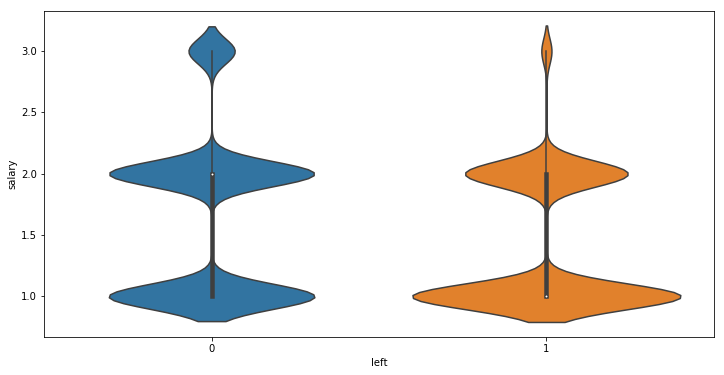

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='left', y='salary', data=hr)
plt.show()

## How does time spent with the company vary among employees that left?

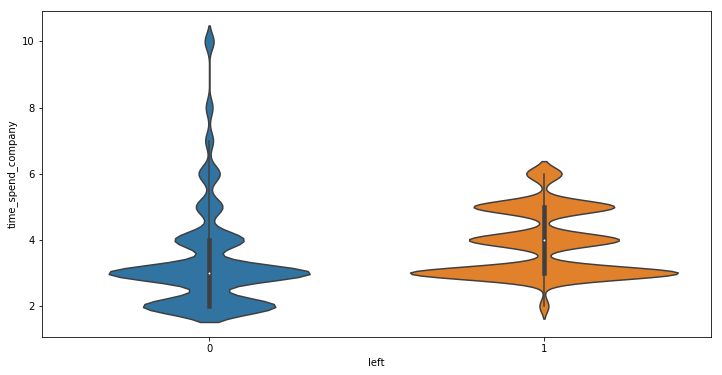

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='left', y='time_spend_company', data=hr)
plt.show()

# Additional Features

###### Adding 10 Features (possible features to help predict attrition)
    1 - last_evaluation, number_project, avg_monthly_hours - somewhat correlated variables combined into one feature
    2 - the above combined feature below its average - values below average may help predict attrition
    3 - satisfaction_level below 0.5 - values below 0.5 may help predict attrition
    4 - last_evaluation at/above average - values at/above average may help predict attrition
    5 - number_project <= 3 - values <= 3 may help predict attrition
    6 - avg_monthly_hours at/above average - values at/above average may help predict attrition
    7 - time_spend_company at/above average - values at/above average may help predict attrition
    8 - salary below average - values below average may help predict attrition
    9 - dept != 'management' - employees not in management may be more likely to leave
    10 - dept = 'sales' or 'technical' or 'support' - there may/may not be a difference in attrition rates for employees in these departments

In [24]:
means = hr[['last_evaluation','number_project','avg_monthly_hours']].mean(axis=0)
stds = hr[['last_evaluation','number_project','avg_monthly_hours']].std(axis=0)

In [25]:
hr['eval_proj_hours'] = ((hr[['last_evaluation','number_project','avg_monthly_hours']] - means) / stds).mean(axis=1)
hr['eval_proj_hours_gte_avg'] = np.where(hr['eval_proj_hours'] >= hr['eval_proj_hours'].mean(), 1, 0)
hr['sat_lvl_gte_avg'] = np.where(hr['satisfaction_level'] < 0.5, 1, 0)
hr['last_eval_gte_avg'] = np.where(hr['last_evaluation'] >= hr['last_evaluation'].mean(), 1, 0)
hr['num_proj_gte_avg'] = np.where(hr['number_project'] <= 3, 1, 0)
hr['monthly_hrs_gte_avg'] = np.where(hr['avg_monthly_hours'] >= hr['avg_monthly_hours'].mean(), 1, 0)
hr['time_w_co_gte_avg'] = np.where(hr['time_spend_company'] >= hr['time_spend_company'].mean(), 1, 0)
hr['sal_lt_avg'] = np.where(hr['salary'] < hr['salary'].mean(), 1, 0)
hr['dept_is_mgmt'] = np.where(hr['dept'] != 'management', 1, 0)
hr['dept_is_sales_tech_supp'] = np.where(hr['dept'].isin(['sales', 'technical', 'support']), 1, 0)

In [26]:
hr.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,eval_proj_hours,eval_proj_hours_gte_avg,sat_lvl_gte_avg,last_eval_gte_avg,num_proj_gte_avg,monthly_hrs_gte_avg,time_w_co_gte_avg,sal_lt_avg,dept_is_mgmt,dept_is_sales_tech_supp
0,0.38,0.53,2,157,3,0,1,0,sales,1,-1.144021,0,1,0,1,0,0,1,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,2,1.010714,1,0,1,0,1,1,0,1,1
2,0.11,0.88,7,272,4,0,1,0,sales,2,1.657270,1,1,1,0,1,1,0,1,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0.769892,1,0,1,0,1,1,1,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,1,-1.150147,0,1,0,1,0,0,1,1,1


## What does a histogram of the combined 'eval_proj_hours' feature look like?

(array([  27.,  176., 1009.,  705.,  402.,  737., 1013., 1284., 1583.,
        1634., 1525., 1207., 1061.,  831.,  699.,  420.,  287.,  241.,
         117.,   41.]),
 array([-1.80933981, -1.61456497, -1.41979013, -1.22501529, -1.03024044,
        -0.8354656 , -0.64069076, -0.44591592, -0.25114108, -0.05636624,
         0.1384086 ,  0.33318344,  0.52795829,  0.72273313,  0.91750797,
         1.11228281,  1.30705765,  1.50183249,  1.69660733,  1.89138217,
         2.08615702]),
 <a list of 20 Patch objects>)

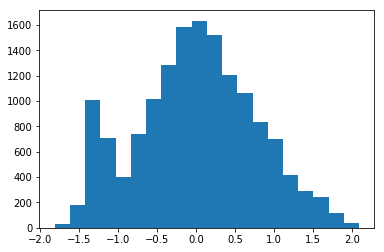

In [27]:
fig = plt.figure()
plt.hist(hr['eval_proj_hours'], bins=20)

## What does a correlation matrix look like with the 'eval_proj_hours' feature included?

In [28]:
plotdf = hr.loc[:, ['last_evaluation', 'number_project', 'avg_monthly_hours']]
plotdf['eval_proj_hours'] = hr['eval_proj_hours']
corrmat2 = plotdf.corr()
print(corrmat2)

                   last_evaluation  number_project  avg_monthly_hours  \
last_evaluation           1.000000        0.349333           0.339742   
number_project            0.349333        1.000000           0.417211   
avg_monthly_hours         0.339742        0.417211           1.000000   
eval_proj_hours           0.739814        0.773746           0.769545   

                   eval_proj_hours  
last_evaluation           0.739814  
number_project            0.773746  
avg_monthly_hours         0.769545  
eval_proj_hours           1.000000  


## Comparing a Decision Tree Classifier with a Random Forest Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import time

/home/dj/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [30]:
X = hr.drop('left', 1)
y = hr['left']
X = pd.get_dummies(X)

In [31]:
X.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,eval_proj_hours,eval_proj_hours_gte_avg,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,1,-1.144021,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,1.010714,1,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,1.657270,1,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0.769892,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,-1.150147,0,...,0,0,0,0,0,0,0,1,0,0


### Decision Tree Classifier

In [32]:
dt_start_time = time.time()
dtree = DecisionTreeClassifier(max_depth=3, random_state=101)
dtree_scores = cross_val_score(dtree, X, y, cv=10)
dt_end_time = time.time()
print("Time elapsed:  --- %s seconds ---" % (dt_end_time - dt_start_time))

Time elapsed:  --- 0.2947077751159668 seconds ---


In [33]:
print(dtree_scores)

[0.96935376 0.962      0.96133333 0.96466667 0.96533333 0.96
 0.96533333 0.962      0.94996664 0.94663109]


In [34]:
dtree_avg = np.mean(dtree_scores)
print(dtree_avg)

0.9606618162645109


### Random Forest Classifier

In [35]:
rfc_start_time = time.time()
rfc = RandomForestClassifier()
rfc_scores = cross_val_score(rfc, X, y, cv=10)
rfc_end_time = time.time()
print("Time elapsed:  --- %s seconds ---" % (rfc_end_time - rfc_start_time))

Time elapsed:  --- 1.25191330909729 seconds ---


In [36]:
print(rfc_scores)

[0.99800133 0.99733333 0.978      0.97866667 0.974      0.99133333
 0.998      0.998      1.         0.99666444]


In [37]:
avg = np.mean(rfc_scores)
print(avg)

0.9909999108740344
